# Load

In [53]:
from fastai.vision import *
from fastai.metrics import error_rate

In [55]:
bs=64
path = untar_data(URLs.PETS); path

PosixPath('/storage/oxford-iiit-pet')

In [57]:
path_anno = path/'annotations'
path_img = path/'images'

In [58]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/storage/oxford-iiit-pet/images/beagle_147.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/leonberger_83.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/leonberger_155.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg'),
 PosixPath('/storage/oxford-iiit-pet/images/boxer_131.jpg')]

In [60]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [61]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [62]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [64]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
beagle,leonberger,leonberger,Abyssinian,havanese
Path: /storage/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
havanese,yorkshire_terrier,japanese_chin,Bengal,american_bulldog
Path: /storage/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1,

# Inference

In [128]:
imgs = ImageList.from_folder('inference')
imgs

ImageList (2 items)
Image (3, 180, 300),Image (3, 690, 647)
Path: inference

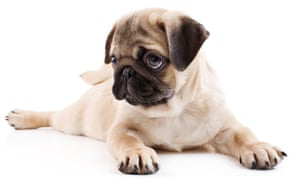

In [129]:
imgs[0]

In [130]:
label, label_idx, probs = learn.predict(imgs[0])
label, label_idx, probs

(Category pug,
 tensor(29),
 tensor([4.0707e-08, 6.4228e-08, 8.0462e-08, 9.4872e-08, 1.8245e-07, 5.3365e-09,
         3.3013e-08, 6.2759e-08, 1.8010e-07, 8.4903e-09, 4.3259e-06, 1.0492e-07,
         7.3010e-07, 2.7240e-08, 2.1524e-07, 3.4632e-08, 6.0680e-06, 6.3279e-07,
         1.0497e-08, 4.3297e-08, 3.3927e-09, 2.1726e-08, 6.1554e-07, 1.3690e-06,
         4.1666e-08, 3.2967e-07, 5.2137e-08, 2.3708e-08, 2.5447e-08, 9.9998e-01,
         9.1305e-06, 1.7630e-08, 1.1765e-08, 7.8468e-08, 1.5334e-07, 8.6301e-08,
         2.0423e-08]))

In [131]:
import matplotlib.pyplot as plt

In [132]:
data.classes, data.c

(['Abyssinian',
  'Bengal',
  'Birman',
  'Bombay',
  'British_Shorthair',
  'Egyptian_Mau',
  'Maine_Coon',
  'Persian',
  'Ragdoll',
  'Russian_Blue',
  'Siamese',
  'Sphynx',
  'american_bulldog',
  'american_pit_bull_terrier',
  'basset_hound',
  'beagle',
  'boxer',
  'chihuahua',
  'english_cocker_spaniel',
  'english_setter',
  'german_shorthaired',
  'great_pyrenees',
  'havanese',
  'japanese_chin',
  'keeshond',
  'leonberger',
  'miniature_pinscher',
  'newfoundland',
  'pomeranian',
  'pug',
  'saint_bernard',
  'samoyed',
  'scottish_terrier',
  'shiba_inu',
  'staffordshire_bull_terrier',
  'wheaten_terrier',
  'yorkshire_terrier'],
 37)

Text(0, 0.5, 'probability')

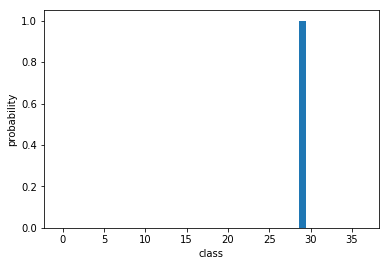

In [133]:
plt.bar(range(data.c), probs)
plt.xlabel('class')
plt.ylabel('probability')

Text(0, 0.5, 'probability')

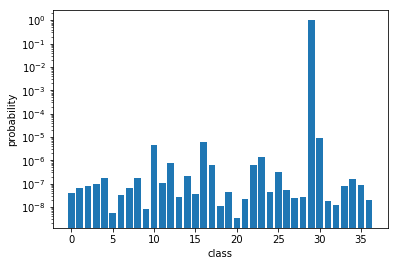

In [134]:
plt.bar(range(data.c), probs)
plt.yscale('log')
plt.xlabel('class')
plt.ylabel('probability')

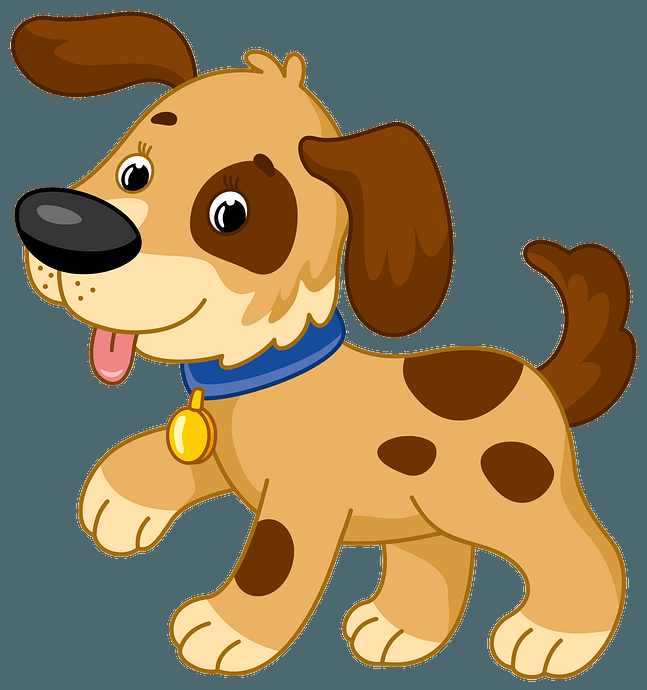

In [135]:
imgs[1]

In [122]:
label, label_idx, probs = learn.predict(imgs[1])
label, label_idx, probs

(Category yorkshire_terrier,
 tensor(36),
 tensor([4.1276e-03, 2.6717e-02, 3.0268e-03, 3.4079e-03, 2.7003e-03, 3.9566e-03,
         6.1194e-03, 3.0401e-03, 5.7808e-03, 8.8365e-03, 1.5253e-04, 8.4757e-03,
         1.2672e-03, 2.2936e-03, 3.1149e-01, 9.6997e-02, 5.4084e-03, 1.0970e-03,
         1.0332e-03, 9.4154e-04, 1.7228e-03, 5.6897e-04, 7.5621e-03, 8.6668e-04,
         7.1773e-04, 1.8189e-04, 2.9037e-02, 5.9992e-03, 1.2517e-03, 7.9459e-05,
         7.7395e-03, 6.1391e-03, 1.0704e-03, 6.9492e-04, 1.1078e-03, 3.1926e-04,
         4.3807e-01]))

In [123]:
import matplotlib.pyplot as plt

In [124]:
data.classes, data.c

(['Abyssinian',
  'Bengal',
  'Birman',
  'Bombay',
  'British_Shorthair',
  'Egyptian_Mau',
  'Maine_Coon',
  'Persian',
  'Ragdoll',
  'Russian_Blue',
  'Siamese',
  'Sphynx',
  'american_bulldog',
  'american_pit_bull_terrier',
  'basset_hound',
  'beagle',
  'boxer',
  'chihuahua',
  'english_cocker_spaniel',
  'english_setter',
  'german_shorthaired',
  'great_pyrenees',
  'havanese',
  'japanese_chin',
  'keeshond',
  'leonberger',
  'miniature_pinscher',
  'newfoundland',
  'pomeranian',
  'pug',
  'saint_bernard',
  'samoyed',
  'scottish_terrier',
  'shiba_inu',
  'staffordshire_bull_terrier',
  'wheaten_terrier',
  'yorkshire_terrier'],
 37)

Text(0, 0.5, 'probability')

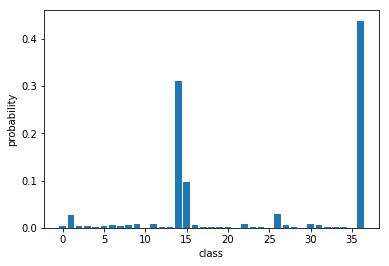

In [125]:
plt.bar(range(data.c), probs)
plt.xlabel('class')
plt.ylabel('probability')

Text(0, 0.5, 'probability')

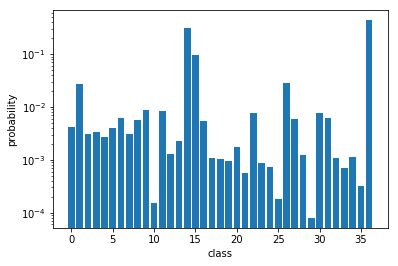

In [126]:
plt.bar(range(data.c), probs)
plt.yscale('log')
plt.xlabel('class')
plt.ylabel('probability')